In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [62]:
data=pd.read_csv("spam_ham_dataset.csv")

In [63]:
data.drop(["Unnamed: 0","label"],axis=1,inplace=True)

In [64]:
data["label_num"].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [49]:
text=[]
for i in data["text"]:
    text.append(stemming(i[7:]))

In [50]:
text=np.array(text)

In [51]:
vectorizer = TfidfVectorizer()
vectorizer.fit(text)

TfidfVectorizer()

In [59]:
cleaned=vectorizer.transform(text).toarray()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [68]:
y=np.array(data["label_num"])

In [69]:
x_train,x_test,y_train,y_test=train_test_split(cleaned,y,test_size=0.2,stratify=y)

In [70]:
lr=LogisticRegression().fit(x_train,y_train)

In [71]:
lr.score(x_train,y_train)

0.9954061895551257

In [72]:
lr.score(x_test,y_test)

0.9835748792270531

In [73]:
dl=DecisionTreeClassifier().fit(x_train,y_train)

In [74]:
dl.score(x_train,y_train)

1.0

In [75]:
dl.score(x_test,y_test)

0.9487922705314009

In [76]:
from sklearn.metrics import *
from seaborn import *

In [77]:
pred=dl.predict(x_test)

In [78]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       724
           1       0.93      0.90      0.91       311

    accuracy                           0.95      1035
   macro avg       0.94      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



<Axes: >

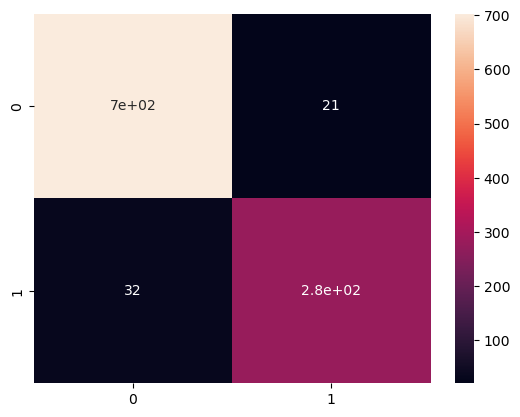

In [79]:
heatmap(confusion_matrix(pred,y_test),annot=True)

In [81]:
import joblib
joblib.dump(dl,"model.joblib")

['model.joblib']

In [82]:
joblib.dump(vectorizer,"vectorizer.joblib")

['vectorizer.joblib']

In [89]:
dl.predict([x_test[0]])

array([0])

In [87]:
x_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
joblib.load("vectorizer.joblib").transform(["hbu"])

<1x37890 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>